In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [20]:
class TomekLinks:
    def __init__(self):
        pass

    def fit_resample(self, X, y):
        nn = NearestNeighbors(n_neighbors=2)
        nn.fit(X)
        
        distances, indices = nn.kneighbors(X)
        
        tomek_links = []
        
        for i in range(len(X)):
            neighbor_idx = indices[i][1]
            
            if y[i] != y[neighbor_idx]:
                tomek_links.append((i, neighbor_idx))
        
        indices_to_remove = set()
        for i, j in tomek_links:
            if y[i] > y[j]:
                indices_to_remove.add(i)
            else:
                indices_to_remove.add(j)
        
        mask = np.ones(len(X), dtype=bool)
        mask[list(indices_to_remove)] = False
        
        X_resampled = X[mask]
        y_resampled = y[mask]

        class_counts = Counter(y_resampled)
        min_class_count = min(class_counts.values())

        X_balanced = []
        y_balanced = []

        for class_label in class_counts.keys():
            class_indices = np.where(y == class_label)[0]
            selected_indices = np.random.choice(class_indices, min_class_count, replace=False)
            X_balanced.append(X[selected_indices])
            y_balanced.append(y[selected_indices])

        X_balanced = np.vstack(X_balanced)
        y_balanced = np.hstack(y_balanced)
        
        return X_balanced, y_balanced

In [21]:
tomek_links = TomekLinks()
X_train_resampled, y_train_resampled = tomek_links.fit_resample(X_train, y_train)

In [22]:
print("y_train:", Counter(y_train))
print("y_train_resampled:", Counter(y_train_resampled))

y_train: Counter({2: 44, 0: 42, 1: 41})
y_train_resampled: Counter({2: 40, 0: 40, 1: 40})


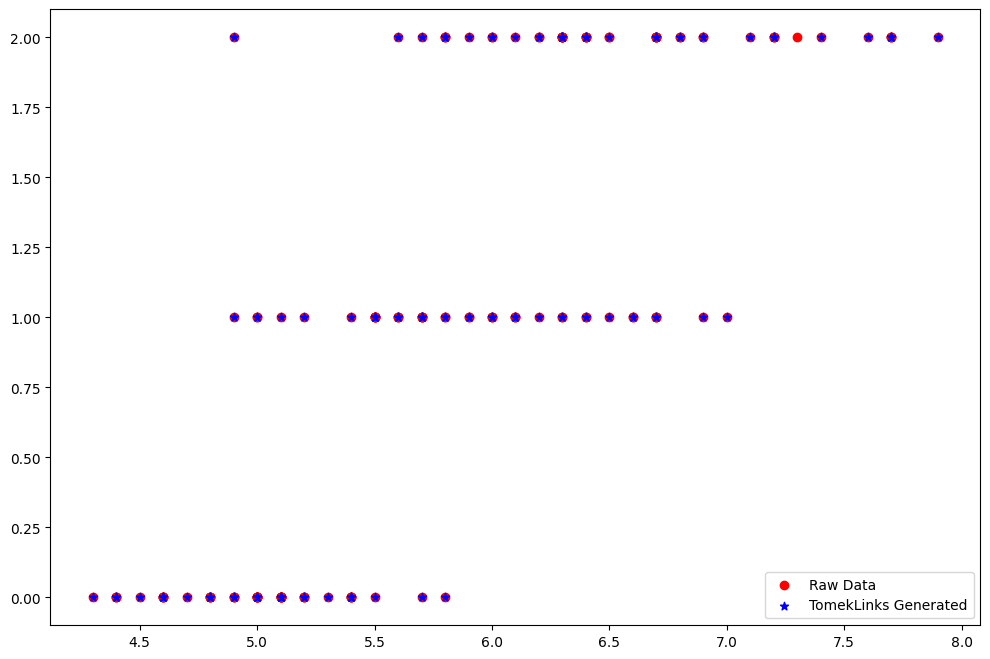

In [23]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train[:, 0], y_train, color="r", marker="o")
plt.scatter(X_train_resampled[:, 0], y_train_resampled, color="b", marker="*")
plt.legend(["Raw Data", "TomekLinks Generated"])
plt.show()